In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
df = pd.read_csv('Test_drug_prediction.csv',index_col=0)

In [3]:
df.head()

,target,LOC729737,CICP3,LOC101060494,LINC00115,LINC01128,LOC284600,LOC100130417,SAMD11,NOC2L,...,MAFIP,LOC283788,KIR3DS1,LOC100507412,KIR2DS5,LOC100288966,KIR2DS1,MGC70870,HLA.DRB4,HLA.DRB3
1,2.646123,8.616,6.249,5.054,2.287,6.513,7.131,5.631,6.570,8.032,...,6.635,3.530,2.286,8.587,2.428,6.242,2.186,6.282,2.641,4.487
2,2.510278,8.876,6.623,5.462,2.446,7.144,6.936,6.677,7.317,8.142,...,6.185,3.158,2.286,8.106,2.400,6.342,2.141,5.654,2.541,5.107
3,1.612207,9.265,6.461,6.320,2.288,7.004,7.306,6.100,7.144,8.794,...,6.337,2.797,2.286,9.080,2.286,6.242,2.286,5.968,2.616,4.057
4,1.517873,9.371,6.227,6.728,2.287,7.244,7.329,5.535,6.379,8.151,...,6.028,3.333,2.286,8.219,2.408,6.394,2.144,8.205,2.452,4.458
5,1.200902,8.413,6.233,3.416,2.291,6.554,7.438,6.160,7.233,8.042,...,6.065,3.235,2.286,8.715,2.429,6.708,2.184,5.825,2.612,4.517


In [4]:
# check the shape of dataframe
df.shape

(51, 23060)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Columns: 23060 entries, target to HLA.DRB3
dtypes: float64(23060)
memory usage: 9.0 MB


In [6]:
df.isnull().sum()

target          0
LOC729737       0
CICP3           0
LOC101060494    0
LINC00115       0
               ..
LOC100288966    0
KIR2DS1         0
MGC70870        0
HLA.DRB4        0
HLA.DRB3        0
Length: 23060, dtype: int64

In [7]:
df.head()

,target,LOC729737,CICP3,LOC101060494,LINC00115,LINC01128,LOC284600,LOC100130417,SAMD11,NOC2L,...,MAFIP,LOC283788,KIR3DS1,LOC100507412,KIR2DS5,LOC100288966,KIR2DS1,MGC70870,HLA.DRB4,HLA.DRB3
1,2.646123,8.616,6.249,5.054,2.287,6.513,7.131,5.631,6.570,8.032,...,6.635,3.530,2.286,8.587,2.428,6.242,2.186,6.282,2.641,4.487
2,2.510278,8.876,6.623,5.462,2.446,7.144,6.936,6.677,7.317,8.142,...,6.185,3.158,2.286,8.106,2.400,6.342,2.141,5.654,2.541,5.107
3,1.612207,9.265,6.461,6.320,2.288,7.004,7.306,6.100,7.144,8.794,...,6.337,2.797,2.286,9.080,2.286,6.242,2.286,5.968,2.616,4.057
4,1.517873,9.371,6.227,6.728,2.287,7.244,7.329,5.535,6.379,8.151,...,6.028,3.333,2.286,8.219,2.408,6.394,2.144,8.205,2.452,4.458
5,1.200902,8.413,6.233,3.416,2.291,6.554,7.438,6.160,7.233,8.042,...,6.065,3.235,2.286,8.715,2.429,6.708,2.184,5.825,2.612,4.517


In [8]:
# df['see'] = df['target'].map(lambda x:'HS' if x >1 else 'HR' )

In [9]:
df['target']=df['target'].map(lambda x: 'HR' if str(x)[0]=='-' and len(str(x))>1 else 'HS')

In [10]:
df['target'].value_counts()

HS    27
HR    24
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

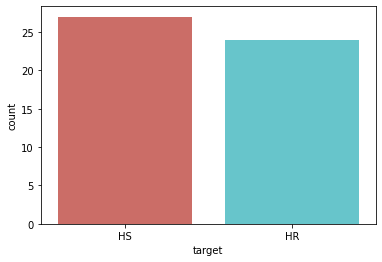

In [11]:
sns.countplot(x='target',data=df,palette='hls')

In [12]:
df['target'].replace({'HS':1,'HR':0},inplace=True)

In [13]:
X = df.drop(['target'],axis=1)
y = df.target

In [14]:
X.shape

(51, 23059)

In [15]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    shuffle=True, random_state=2)

In [16]:
# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2500)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [17]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", accuracy_score(y_train,clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Classification Report\n",metrics.classification_report(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.2727272727272727
Precision: 0.3333333333333333
Recall: 0.3333333333333333
Classification Report
               precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.33      0.33      0.33         6

    accuracy                           0.27        11
   macro avg       0.27      0.27      0.27        11
weighted avg       0.27      0.27      0.27        11




Test confusion_matrix


Text(33.0, 0.5, 'True')

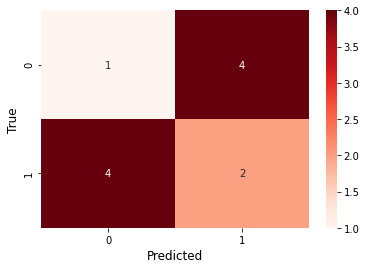

In [18]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Reds')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Applying PCA for dimensionality reduction

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [20]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

Eigenvalues:
[2.53069720e+03 1.90834033e+03 1.12258232e+03 9.89249359e+02
 9.36812308e+02 8.36339728e+02 7.59102046e+02 7.06834207e+02
 6.32349884e+02 6.06239597e+02 5.59092351e+02 5.27535591e+02
 5.04939738e+02 4.77490534e+02 4.51086860e+02 4.43022226e+02
 4.26823847e+02 4.20825656e+02 4.06216469e+02 3.95478543e+02
 3.82070863e+02 3.74624220e+02 3.59691733e+02 3.45262409e+02
 3.44213106e+02 3.38329724e+02 3.23340279e+02 3.18389572e+02
 3.10271779e+02 2.94834726e+02 2.91095930e+02 2.88290055e+02
 2.81325232e+02 2.75985685e+02 2.67732045e+02 2.65994255e+02
 2.54323505e+02 2.47230592e+02 2.39962374e+02 2.35837830e+02
 2.25189037e+02 2.17237615e+02 2.12208306e+02 2.06105957e+02
 1.98348807e+02 1.83841300e+02 1.74021344e+02 1.60236574e+02
 1.49966654e+02 1.12139707e+02 2.08010818e-27]

Variances (Percentage):
[1.07601513e+01 8.11398165e+00 4.77305449e+00 4.20614239e+00
 3.98318778e+00 3.55599319e+00 3.22758995e+00 3.00535481e+00
 2.68865846e+00 2.57764136e+00 2.37717823e+00 2.24300354e+00


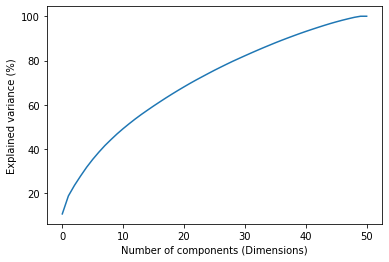

In [21]:
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.show()

In [22]:

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 38


In [23]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0          1          2          3          4          5   \
0 -26.387038  17.885021 -19.218873  15.009501 -13.099040  15.220959   
1 -75.707965 -46.515844 -14.413862  25.617065  13.869636 -41.578213   
2  23.661726  21.602001   1.260864 -54.004438  10.119403  35.844762   
3 -32.215342  17.578032 -15.117318 -31.448696  -9.112218  -9.140470   
4 -62.811141  20.631005 -33.338054  27.991620 -14.376955  15.270549   

          6          7          8          9   ...         28         29  \
0  44.110563 -46.014423   6.652818 -12.016816  ...  15.682684 -17.510863   
1 -20.389883   9.698321  11.963878  -8.704265  ...  -6.220903  16.532756   
2  56.807089 -25.958126  -8.200569 -45.583283  ...  21.656777 -16.260326   
3  25.639791  -9.762634   6.833441  14.600798  ...  -3.178336 -10.186815   
4  43.929721 -34.107979   7.169905   0.097058  ...   1.274969   7.765100   

          30         31         32         33         34         35  \
0  11.918715 -11.907930 -29.163956   2.096838

In [24]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=2)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
clf_pca = LogisticRegression()

# Train the model
clf_pca.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = clf_pca.predict(X_test_pca)


C:\Users\kale_\anaconda3\envs\new_stream\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", accuracy_score(y_train, clf_pca.predict(X_train_pca)))
print("Test accuracy:",accuracy_score(y_test, y_pred_pca))
print("Precision:",metrics.precision_score(y_test, y_pred_pca))
print("Recall:",metrics.recall_score(y_test, y_pred_pca))
print("Classification Report:\n",metrics.classification_report(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.5454545454545454
Precision: 0.5714285714285714
Recall: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.33      0.33      0.33         6

    accuracy                           0.27        11
   macro avg       0.27      0.27      0.27        11
weighted avg       0.27      0.27      0.27        11




Test confusion_matrix


Text(33.0, 0.5, 'True')

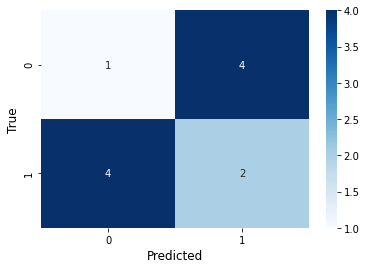

In [26]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### Experimenting for best classifier

In [27]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [28]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

C:\Users\kale_\anaconda3\envs\new_stream\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [30]:
### fitting data in LazyClassifier
models,predictions = lazy_clf.fit(X_train_pca, X_test_pca, y_train, y_test)

#checking for the best classifier 
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 63.42it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.55               0.55     0.55      0.55   
CalibratedClassifierCV             0.55               0.55     0.55      0.55   
LogisticRegression                 0.55               0.53     0.53      0.54   
QuadraticDiscriminantAnalysis      0.55               0.53     0.53      0.54   
SVC                                0.55               0.52     0.52      0.49   
NuSVC                              0.55               0.52     0.52      0.49   
RandomForestClassifier             0.55               0.52     0.52      0.49   
LabelPropagation                   0.45               0.48     0.48      0.40   
LabelSpreading                     0.45               0.48     0.48      0.40   
BernoulliNB                        0.45               0.48     0.48      0.40   
ExtraTreesClassifier        

### Experimenting with Feature selection using SelectKBest

In [31]:
from sklearn.model_selection import train_test_split
# Train test split

X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [32]:
# Instantiate select features
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
select_features = SelectKBest(chi2, k = 200).fit(X_train, Y_train)

# Top 200 features
selected_features = select_features.get_support()
print("Top 200 features: ", list(X_train.columns[selected_features]))

Top 200 features:  ['AK5', 'MCOLN2', 'GBP5', 'LINC00622', 'TXNIP', 'S100A4', 'IFI16', 'FAM129A', 'SYT14', 'ID2', 'TRIB2', 'CDC42EP3', 'CYP1B1', 'CNRIP1', 'DGUOK.AS1', 'EVA1A', 'MALL', 'INHBB', 'TNFAIP6', 'PLA2R1', 'FAP', 'LINC01116', 'ITGA4', 'NRP2', 'C3orf14', 'GXYLT2', 'EPHA3', 'ARHGAP31', 'ROPN1', 'ROPN1B', 'TM4SF4', 'RARRES1', 'TRIM59', 'BCHE', 'TNFSF10', 'NLGN1', 'GNB4', 'CLDN1', 'PPP2R2C', 'S100P', 'SLIT2', 'SLC34A2', 'IGFBP7', 'CXCL8', 'EREG', 'AREG', 'ART3', 'PLAC8', 'SPP1', 'LEF1', 'ENPEP', 'PCDH18', 'LOC100507639', 'TRIM2', 'GK3P', 'GPM6A', 'SORBS2', 'FST', 'LUCAT1', 'MCTP1', 'PDLIM4', 'CD74', 'SPARC', 'HTATSF1P2', 'NRN1', 'DSP', 'GCNT2', 'RNF182', 'HLA.DPA1', 'LGSN', 'KCNQ5', 'POPDC3', 'FABP7', 'CTGF', 'EYA4', 'PLAGL1', 'SLC22A3', 'LOC100128885', 'PON3', 'DOCK4', 'AASS', 'AKR1B10', 'PTN', 'DLC1', 'SFRP1', 'PLAT', 'SNAI2', 'ZFHX4.AS1', 'MMP16', 'NIPAL2', 'COLEC10', 'HAS2', 'FBXO32', 'MTSS1', 'LINGO2', 'SNX18P3', 'ALDH1A1', 'DAPK1', 'PTGR1', 'TNC', 'PTGES', 'RNU5D.2P', 'OLFM1'

In [33]:
# Apply select features to training and test set
X_train_chi2 = select_features.transform(X_train)
X_test_chi2 = select_features.transform(X_test)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
from sklearn.linear_model import LogisticRegression
clf_chi2 = LogisticRegression()

# Train the model
clf_chi2.fit(sc.fit_transform(X_train_chi2), Y_train)

# Make predictions
Y_pred_chi2 = clf_chi2.predict(sc.fit_transform(X_test_chi2))

In [36]:
from sklearn import metrics 
import numpy as np
print("Test accuracy:", metrics.accuracy_score(Y_test, Y_pred_chi2))
print("Precision:",metrics.precision_score(Y_test, Y_pred_chi2))
print("Recall:",metrics.recall_score(Y_test, Y_pred_chi2))
print("Classification Report\n",metrics.classification_report(Y_test, Y_pred_chi2))

Test accuracy: 0.5454545454545454
Precision: 0.5555555555555556
Recall: 0.8333333333333334
Classification Report
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.56      0.83      0.67         6

    accuracy                           0.55        11
   macro avg       0.53      0.52      0.48        11
weighted avg       0.53      0.55      0.49        11



In [37]:
lazy_FS_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [38]:
### fitting data in LazyClassifier
FS_models,fs_predictions = lazy_FS_clf.fit(X_train_chi2, X_test_chi2, y_train, y_test)

#checking for the best classifier 
print(FS_models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 49.08it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.55               0.52     0.52      0.49   
LogisticRegression                 0.55               0.52     0.52      0.49   
SGDClassifier                      0.55               0.52     0.52      0.49   
CalibratedClassifierCV             0.55               0.52     0.52      0.49   
RidgeClassifierCV                  0.55               0.52     0.52      0.49   
RidgeClassifier                    0.55               0.52     0.52      0.49   
Perceptron                         0.55               0.52     0.52      0.49   
PassiveAggressiveClassifier        0.55               0.52     0.52      0.49   
DecisionTreeClassifier             0.45               0.45     0.45      0.45   
QuadraticDiscriminantAnalysis      0.45               0.45     0.45      0.45   
LabelPropagation            